In [2]:
using Pkg

using JSON
using SolidStateDetectors
using Unitful
using Plots
using LegendHDF5IO

In [3]:
minmum_wp = [
    0.9940752,        # 0.5 mm
    0.9881764,        # 0.45 mm
    0.98422533,       # 0.4 mm
    0.9524081,        # 0.35 mm
    0.90671873,       # 0.3 mm
    0.844832,         # 0.25 mm
    0.5835533,        # 0.2 mm
    0.23646902,       # 0.15 mm
    0.09727309,       # 0.1 mm
    0.009628673,      # 0.05 mm
    4.5629957e-7      # 0.02 mm
]

n_points = [
     182000,     # 350 × 520
     183380,     # 346 × 530
     196560,     # 364 × 540
     193680,     # 360 × 538
     187488,     # 336 × 558
     197568,     # 336 × 588
     161880,     # 284 × 570
     204624,     # 294 × 696
     429240,     # 420 × 1022
    1647452,     # 818 × 2014
   10084144      # 2012 × 5012
]
max_tick_array = [
    0.5u"mm",
    0.45u"mm",
    0.4u"mm",
    0.35u"mm",
    0.3u"mm",
    0.25u"mm",
    0.2u"mm",
    0.15u"mm",
    0.1u"mm",
    0.05u"mm",
    0.02u"mm"
]


11-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(mm,), 𝐋, nothing}}}:
 0.5 mm
 0.45 mm
 0.4 mm
 0.35 mm
 0.3 mm
 0.25 mm
 0.2 mm
 0.15 mm
 0.1 mm
 0.05 mm
 0.02 mm

In [11]:
function annotate_points!(p, label, y; dx=0.08, fs=8)
    x = 1:length(label)
    for (xi, yi) in zip(x, y)
        annotate!(p, xi + dx, yi, text(string(yi), :left, fs))
    end
end


annotate_points! (generic function with 1 method)

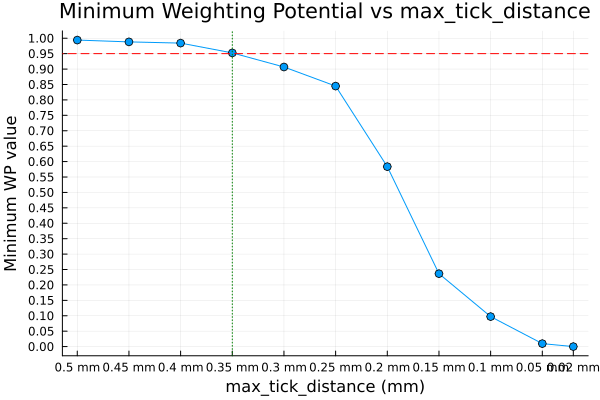

"/home/ritaferi/Phd/SSDdev/notebooks/minimum_wp_vs_max_tick_distance.png"

In [13]:

# Dati numerici
#max_tick_array = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
#minmum_wp = [0.996, 0.992, 0.971, 0.964, 0.971, 0.815, 0.597, 0.171, 0.041]

# Etichette personalizzate
xtick_labels = ["0.5 mm", "0.45 mm", "0.4 mm", "0.35 mm", "0.3 mm", "0.25 mm", "0.2 mm", "0.15 mm", "0.1 mm", "0.05 mm", "0.02 mm"]

p = plot(max_tick_array, minmum_wp,
     xlabel="max_tick_distance", 
     ylabel="Minimum WP value",
     legend=false,
     marker=:o,
     title="Minimum Weighting Potential vs max_tick_distance",
     xticks=(max_tick_array, xtick_labels),
     yticks=0:0.05:1.0,
     xflip = true)  # questo inverte l'asse X

hline!(p, [0.95], linestyle=:dash, color=:red, label="Thresholds")
vline!(p, [max_tick_array[4]], linestyle=:dot, color=:green, label="Thresholds")
display(p)
savefig(p, "minimum_wp_vs_max_tick_distance.png")


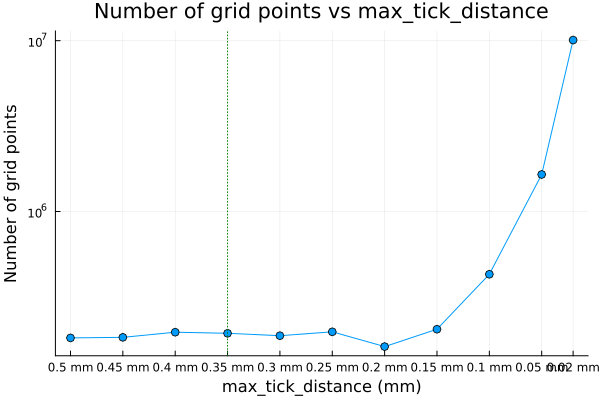

In [23]:

# Dati numerici
#max_tick_array = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
#minmum_wp = [0.996, 0.992, 0.971, 0.964, 0.971, 0.815, 0.597, 0.171, 0.041]

# Etichette personalizzate
xtick_labels = ["0.5 mm", "0.45 mm", "0.4 mm", "0.35 mm", "0.3 mm", "0.25 mm", "0.2 mm", "0.15 mm", "0.1 mm", "0.05 mm", "0.02 mm"]
ytick_labels_npoints = ["182k", "183k", "196k", "193k", "187k", "197k", "161k", "204k", "429k", "1.65M", "10M"]
plot(max_tick_array, n_points,
     xlabel="max_tick_distance", 
     ylabel="Number of grid points",
     yscale=:log10,
     legend=false,
     marker=:o,
     #yticks=0:1000000:10084144,
     title="Number of grid points vs max_tick_distance",
     xticks=(max_tick_array, xtick_labels),
     #yticks=(n_points, ytick_labels_npoints),
     xflip = true)  # questo inverte l'asse X

vline!([max_tick_array[4]], linestyle=:dot, color=:green, label="Thresholds")
